In [1]:
# Importando bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Carregando o arquivo csv

In [4]:
df = pd.read_csv('diabetes_unclean.csv')

In [5]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1009 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [7]:
# Temos alguns valores nulos em algumas colunas no dataset, 
# devemos eliminá-las
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          1
Urea         1
Cr           2
HbA1c        3
Chol         2
TG           2
HDL          1
LDL          2
VLDL         1
BMI          0
CLASS        0
dtype: int64

In [8]:
# No caso da coluna 'HbA1c', vamos completas os valores vazios com a média dos outros valores da lista
# Nos outros casos vamos simplismente eliminar as linhas com valores faltantes

In [9]:
mean_value = df['HbA1c'].mean()
mean_value

8.284155069582505

In [10]:
df['HbA1c'].fillna(mean_value, inplace=True)

In [11]:
df.dropna(axis=0, inplace=True)

In [12]:
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [13]:
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.900000,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.900000,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,188,454316,F,75.0,10.3,113.0,8.600000,4.2,1.6,0.9,2.6,0.7,32.0,Y
1003,189,454316,M,58.0,4.0,55.0,7.900000,4.9,2.0,1.2,1.4,1.1,35.0,Y
1005,192,454316,M,55.0,4.8,88.0,8.284155,5.7,4.0,0.9,3.3,1.8,30.0,Y
1007,194,454316,F,57.0,4.1,70.0,9.300000,5.3,3.3,1.0,1.4,1.3,29.0,Y


In [14]:
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [15]:
# Correlação entre as variáveis numéricas do dataset

In [16]:
df_corr = df[['ID', 'No_Pation', 
    #'Gender', 
    'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 
    #'CLASS'
    ]]

In [17]:
df_corr.corr()*100 # Em porcentagem

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
ID,100.000000,6.459944,-7.268708,-9.489129,-10.004626,-0.903712,4.541433,-5.411050,2.522635,-6.571827,14.570036,4.726988
No_Pation,6.459944,100.000000,-8.887012,-1.906084,0.097307,-3.235047,-3.028816,-3.985867,-1.355412,-0.351966,11.363521,1.773831
AGE,-7.268708,-8.887012,100.000000,10.861313,5.693970,38.467493,3.896589,14.927435,-2.102902,1.149645,-9.079643,38.117602
Urea,-9.489129,-1.906084,10.861313,100.000000,62.480998,-2.330659,0.128610,4.093896,-3.784269,-0.667266,-1.157318,4.575289
Cr,-10.004626,0.097307,5.693970,62.480998,100.000000,-3.773501,-0.763642,5.603065,-2.357833,4.098084,1.032835,5.484690
HbA1c,-0.903712,-3.235047,38.467493,-2.330659,-3.773501,100.000000,17.767613,21.402986,3.045505,1.153648,7.264056,41.312984
Chol,4.541433,-3.028816,3.896589,0.128610,-0.763642,17.767613,100.000000,31.889389,10.336966,41.923690,7.637253,1.698857
TG,-5.411050,-3.985867,14.927435,4.093896,5.603065,21.402986,31.889389,100.000000,-8.354845,1.509876,14.582546,11.011979
HDL,2.522635,-1.355412,-2.102902,-3.784269,-2.357833,3.045505,10.336966,-8.354845,100.000000,-14.177085,-5.976731,7.258139
LDL,-6.571827,-0.351966,1.149645,-0.667266,4.098084,1.153648,41.923690,1.509876,-14.177085,100.000000,6.244453,-6.872332


In [18]:
# Renomeando a coluna ' No_Pation' para 'Patients_No'
df.rename(columns={'No_Pation':'Patients_No'}, inplace=True)

In [19]:
df

,ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.900000,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.900000,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,188,454316,F,75.0,10.3,113.0,8.600000,4.2,1.6,0.9,2.6,0.7,32.0,Y
1003,189,454316,M,58.0,4.0,55.0,7.900000,4.9,2.0,1.2,1.4,1.1,35.0,Y
1005,192,454316,M,55.0,4.8,88.0,8.284155,5.7,4.0,0.9,3.3,1.8,30.0,Y
1007,194,454316,F,57.0,4.1,70.0,9.300000,5.3,3.3,1.0,1.4,1.3,29.0,Y


In [20]:
df.groupby('Gender')['AGE'].agg(['mean', 'count'])
# Existe um problema, há pessoas classificadas como f e F no gênero, mas deveriam ser todos F

,mean,count
Gender,,
F,53.456019,432
M,53.717584,563
f,55.000000,2


In [21]:
# Renomeando f para F
df.replace({'f':'F'}, inplace=True)

In [22]:
df_genero_idade = df.groupby('Gender')['AGE'].agg(['mean', 'count'])
df_genero_idade

,mean,count
Gender,,
F,53.463134,434
M,53.717584,563


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           997 non-null    int64  
 1   Patients_No  997 non-null    int64  
 2   Gender       997 non-null    object 
 3   AGE          997 non-null    float64
 4   Urea         997 non-null    float64
 5   Cr           997 non-null    float64
 6   HbA1c        997 non-null    float64
 7   Chol         997 non-null    float64
 8   TG           997 non-null    float64
 9   HDL          997 non-null    float64
 10  LDL          997 non-null    float64
 11  VLDL         997 non-null    float64
 12  BMI          997 non-null    float64
 13  CLASS        997 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 116.8+ KB


In [24]:
df.groupby('CLASS')['CLASS'].agg('count')
# Vemos um problema com classes de nomes repetidos aqui

CLASS
N     102
N       1
P      53
Y     832
Y       9
Name: CLASS, dtype: int64

In [25]:
# Checando por valroe únicos na coluna ' CLASS'
df['CLASS'].unique()

# Tem um problema de espaço, vamos arrumar isso

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [26]:
df.replace(to_replace=('N ', 'Y '), value=('N','Y'), inplace=True)

In [27]:
df['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [28]:
df.groupby('CLASS')['CLASS'].agg('count')

CLASS
N    103
P     53
Y    841
Name: CLASS, dtype: int64

<Axes: >

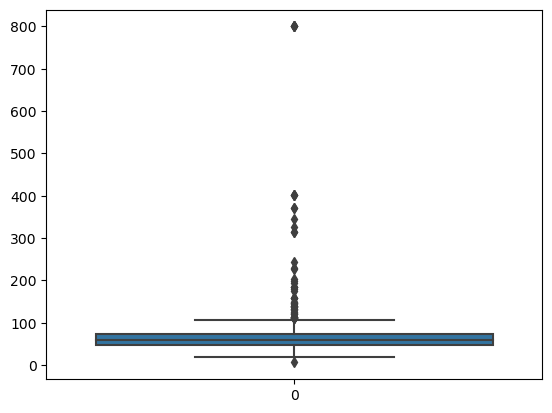

In [29]:
sns.boxplot(df['Cr'])

In [30]:
df['Cr'].describe()

count    997.000000
mean      68.755266
std       60.000956
min        6.000000
25%       48.000000
50%       60.000000
75%       73.000000
max      800.000000
Name: Cr, dtype: float64

In [31]:
# localizando a quantidade de outliers
df[(df['Cr']>100)|(df['Cr']<0)].count()

ID             63
Patients_No    63
Gender         63
AGE            63
Urea           63
Cr             63
HbA1c          63
Chol           63
TG             63
HDL            63
LDL            63
VLDL           63
BMI            63
CLASS          63
dtype: int64

In [32]:
df[(df['Cr']>100)|(df['Cr']<0)]

,ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
20,64,34240,F,49.0,13.5,175.0,5.1,0.5,1.9,1.3,2.8,0.8,24.0,N
83,143,45410,M,63.0,6.6,106.0,4.3,4.8,1.7,1.1,3.0,0.7,20.0,N
87,149,45381,F,40.0,5.8,123.0,4.5,4.6,1.5,0.7,3.0,0.6,24.0,N
91,157,45392,M,50.0,9.6,203.0,5.4,3.8,5.9,0.5,4.3,1.3,22.0,N
93,165,45412,F,77.0,5.0,106.0,5.4,3.9,2.1,1.2,4.2,1.1,24.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,175,45414,M,69.0,10.3,185.0,7.6,4.6,3.2,0.6,2.7,1.4,33.0,Y
985,188,454316,F,75.0,10.3,113.0,8.6,4.2,1.6,0.9,2.6,0.7,32.0,Y
994,199,454316,M,69.0,10.3,185.0,7.7,4.9,1.9,1.2,3.0,0.7,37.0,Y
1000,185,454316,M,64.0,8.8,106.0,8.5,5.9,2.1,1.2,4.0,1.2,32.0,Y


In [33]:
# Verificando se existem linhas com todos os valores das colunas duplicados

In [34]:
df.columns

Index(['ID', 'Patients_No', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol',
       'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [35]:
df.duplicated(['ID', 'Patients_No', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol',
       'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']).sum()

# Foram encontrados 3 linhas com valores duplicados, pecisamos removê-las

3

In [39]:
# Removendo linhas com todas as colunas duplicadas
df.drop_duplicates(inplace=True)

In [40]:
# Checando se os valores duplicados foram removidos
df.duplicated().sum()

0

In [41]:
# Salvando o novo dataset em csv
df.to_csv('df_corrigido.csv')